In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,679 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [5]:
filename = '/content/gdrive/MyDrive/MyLecture/2023/2학기/데이터처리프로그래밍/13주차/welfareClean.csv'
welfare = pd.read_csv(filename, encoding='CP949')

print(welfare.columns)

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대'], dtype='object')


In [6]:
welfare.head()

,성별,생일,결혼 유무,종교 유무,직업 코드,소득,지역구,나이,직업,연령대
0,남성,1948,무응답,없슴,942.0,120.0,서울,73,경비원 및 검표원,노년
1,남성,1945,이혼,없슴,942.0,220.2,서울,76,경비원 및 검표원,노년
2,남성,1946,결혼,없슴,942.0,139.0,서울,75,경비원 및 검표원,노년
3,남성,1953,결혼,없슴,942.0,150.0,서울,68,경비원 및 검표원,노년
4,남성,1960,결혼,있슴,942.0,166.0,서울,61,경비원 및 검표원,노년


In [7]:
print(welfare.columns)

print(welfare.head(10))

print(welfare.describe())

print(welfare['결혼 유무'].unique())

print(welfare['종교 유무'].unique())

print(welfare['지역구'].unique())

print(welfare['직업'].unique())

print(welfare['연령대'].unique())

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대'], dtype='object')
   성별    생일 결혼 유무 종교 유무  직업 코드          소득  지역구  나이         직업 연령대
0  남성  1948   무응답    없슴  942.0  120.000000   서울  73  경비원 및 검표원  노년
1  남성  1945    이혼    없슴  942.0  220.200000   서울  76  경비원 및 검표원  노년
2  남성  1946    결혼    없슴  942.0  139.000000   서울  75  경비원 및 검표원  노년
3  남성  1953    결혼    없슴  942.0  150.000000   서울  68  경비원 및 검표원  노년
4  남성  1960    결혼    있슴  942.0  166.000000   서울  61  경비원 및 검표원  노년
5  남성  1939    결혼    있슴  942.0  241.619016   서울  82  경비원 및 검표원  노년
6  남성  1947    결혼    있슴  942.0  150.000000  수도권  74  경비원 및 검표원  노년
7  남성  1952    이혼    없슴  942.0  170.000000   서울  69  경비원 및 검표원  노년
8  남성  1949    결혼    있슴  942.0  100.000000   서울  72  경비원 및 검표원  노년
9  남성  1942    결혼    있슴  942.0  120.000000   서울  79  경비원 및 검표원  노년
                생일        직업 코드           소득           나이
count  7529.000000  7529.000000  7529.000000  7529.000000
mean   1964.012087   591.243724   241.619016    56.9

In [8]:
CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [10]:
print('결혼 유무 빈도')
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
print(result)

결혼 유무 빈도
결혼 유무
결혼     5307
무응답    1803
이혼      419
Name: 결혼 유무, dtype: int64


Text(0.5, 1.0, '결혼 유무 빈도')

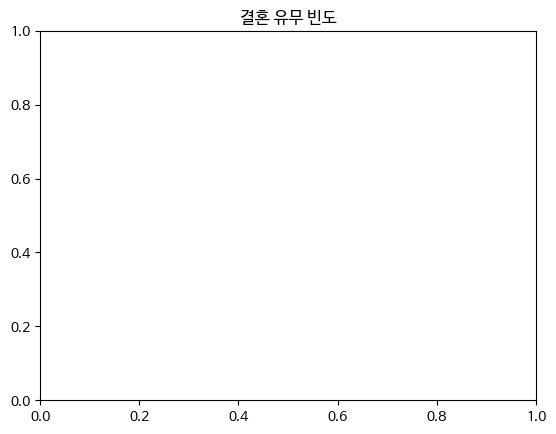

In [11]:
ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 빈도')

seabornWelfare_01.png 파일이 저장되었습니다.


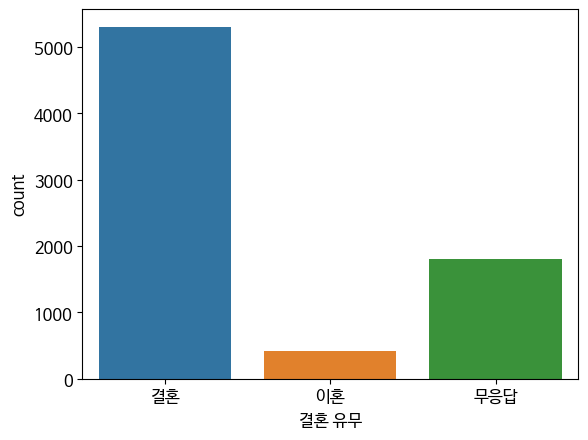

In [ ]:
import seaborn as sns
sns.countplot(x='결혼 유무', data=welfare, order=ORDERING)
FileSave()

In [ ]:
print('결혼 유무 vs 종교 유무 빈도')
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
print(result)

결혼 유무 vs 종교 유무 빈도
결혼 유무  종교 유무
결혼     없음       2778
       있음       2529
무응답    없음        932
       있음        871
이혼     없음        247
       있음        172
Name: 결혼 유무, dtype: int64


seabornWelfare_02.png 파일이 저장되었습니다.


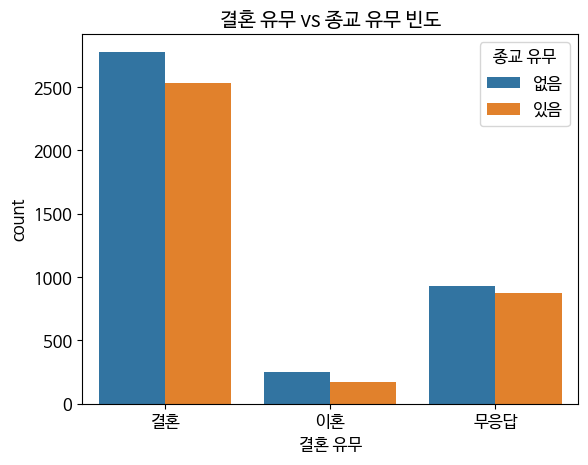

In [ ]:
plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')
sns.countplot(x='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
FileSave()

seabornWelfare_03.png 파일이 저장되었습니다.


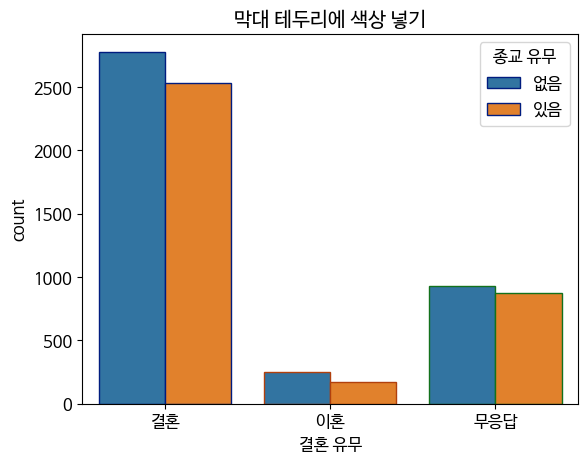

In [ ]:
plt.figure()
plt.title('막대 테두리에 색상 넣기')
sns.countplot(x='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING, linewidth=1, edgecolor=sns.color_palette("dark", 3))
FileSave()

seabornWelfare_04.png 파일이 저장되었습니다.


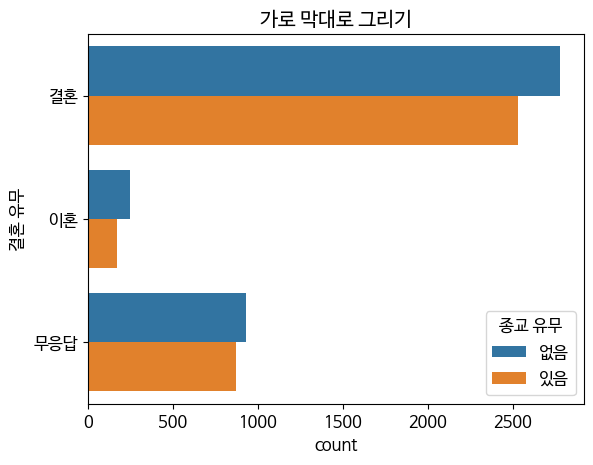

In [ ]:
plt.figure()
plt.title('가로 막대로 그리기')
sns.countplot(y='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
FileSave()

seabornWelfare_05.png 파일이 저장되었습니다.


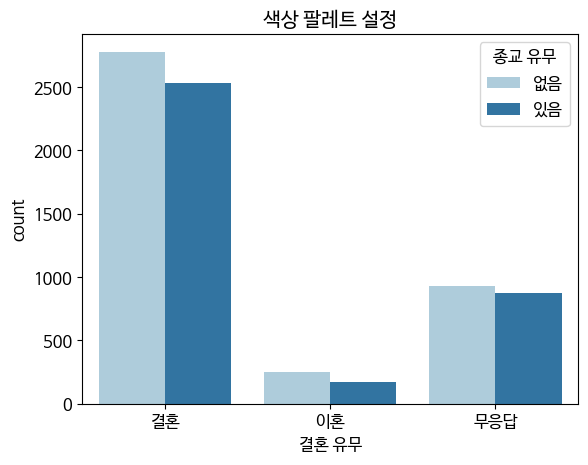

In [ ]:
plt.figure()
plt.title('색상 팔레트 설정')
sns.countplot(x='결혼 유무', hue='종교 유무', palette='Paired', data=welfare, order=ORDERING)
FileSave()

seabornWelfare_08.png 파일이 저장되었습니다.


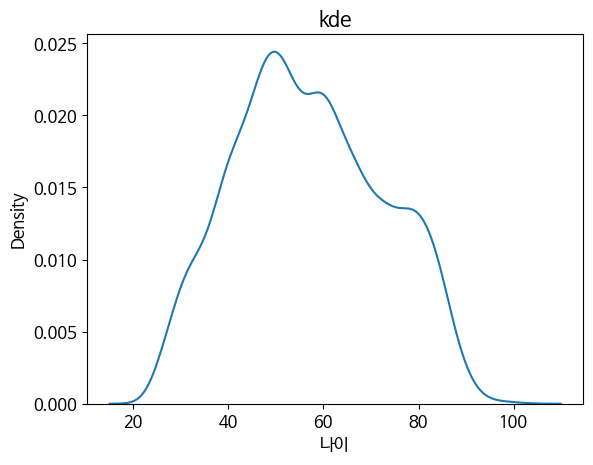

In [ ]:
x = welfare['나이']

plt.figure()
plt.title('kde')
sns.kdeplot(x)
FileSave()

<ipython-input-41-9a5090f4c551>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


seabornWelfare_09.png 파일이 저장되었습니다.


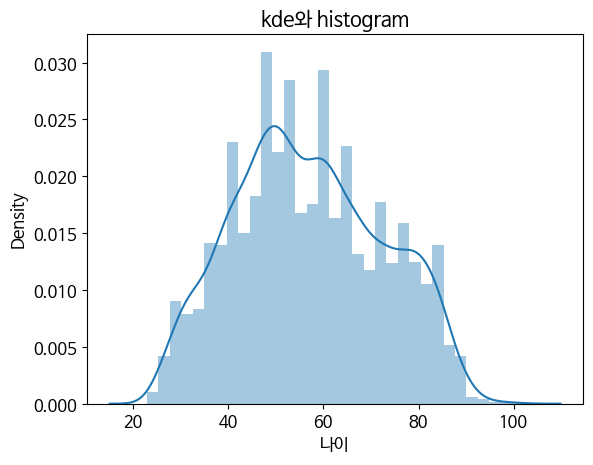

In [ ]:
plt.figure() # kde(kernel density)
plt.title('kde와 histogram')
sns.distplot(x)
FileSave()

pivot_table을 이용한 시각화
결혼 유무         결혼        무응답        이혼
성별                                   
남성     59.806978  43.629973  58.57767
여성     58.890179  53.913251  57.28169
seabornWelfare_10.png 파일이 저장되었습니다.


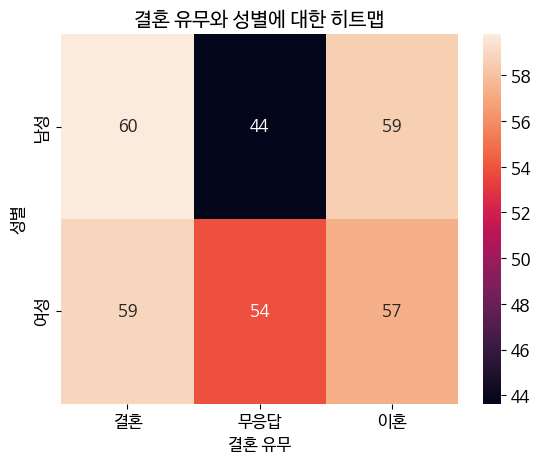

In [ ]:
pivot = welfare.pivot_table(index='성별', columns='결혼 유무', values='나이')
print('pivot_table을 이용한 시각화')
print(pivot)

plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)
FileSave()

상관 관계 시각화
             생일     직업 코드        소득        나이
생일     1.000000 -0.287829  0.093783 -1.000000
직업 코드 -0.287829  1.000000 -0.287414  0.287829
소득     0.093783 -0.287414  1.000000 -0.093783
나이    -1.000000  0.287829 -0.093783  1.000000
seabornWelfare_11.png 파일이 저장되었습니다.


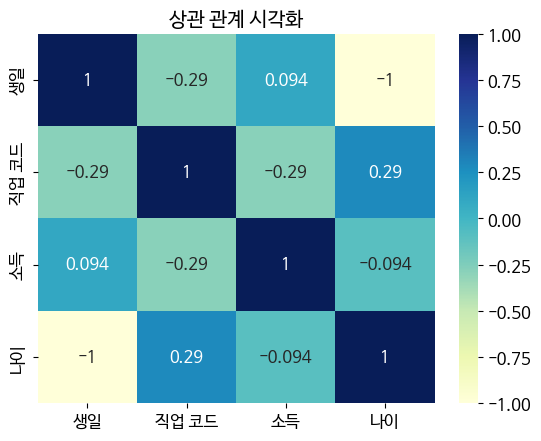

In [ ]:
# correlation(상관관계)를 시각화
# corr() 함수는 데이터의 상관 관계를 보여줍니다.
cor = welfare.corr()
print('상관 관계 시각화')
print(cor)

plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data=cor, annot=True, cmap="YlGnBu")
FileSave()
################

seabornWelfare_14.png 파일이 저장되었습니다.


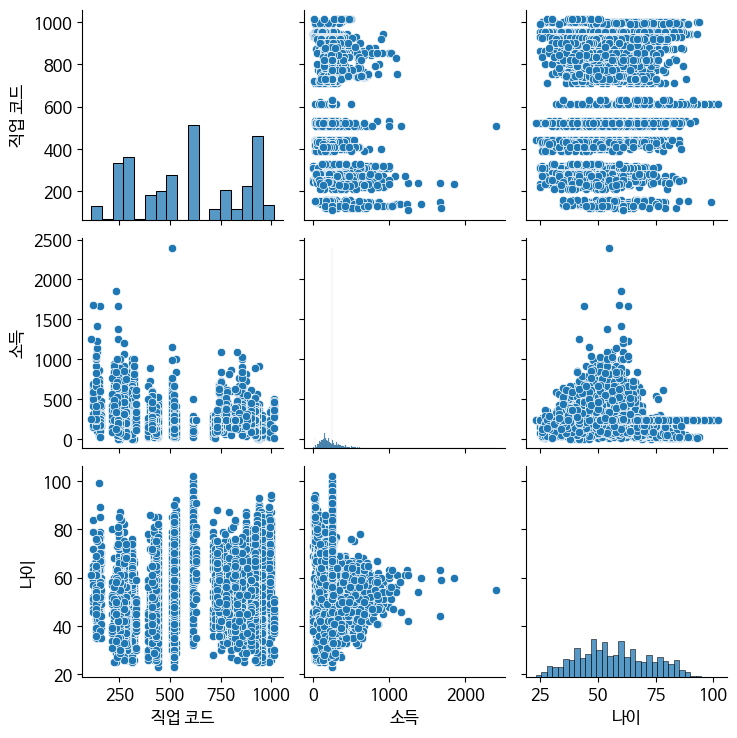

In [ ]:
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

sns.pairplot(data=newwelfare)
FileSave()

seabornWelfare_16.png 파일이 저장되었습니다.


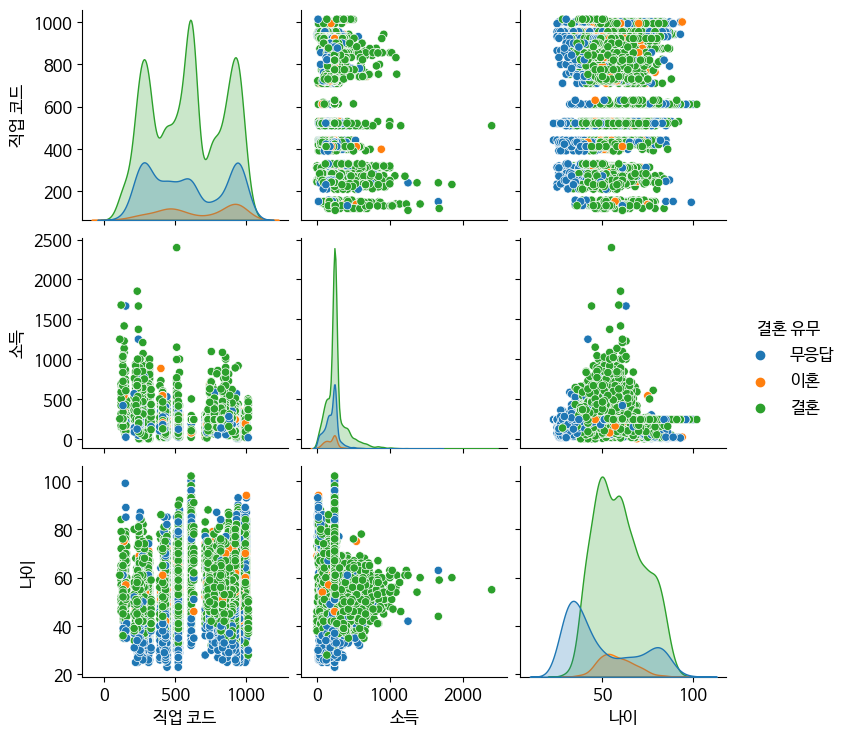

In [ ]:
sns.pairplot(data=newwelfare, hue='결혼 유무')
FileSave()

seabornWelfare_17.png 파일이 저장되었습니다.


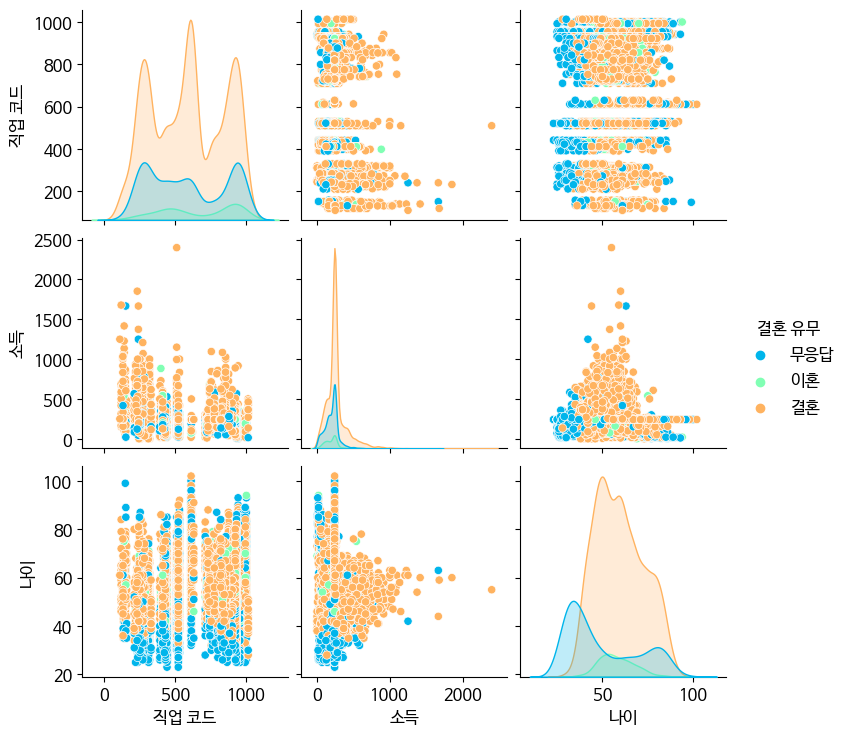

In [ ]:
sns.pairplot(data=newwelfare, hue='결혼 유무', palette="rainbow")
FileSave()

seabornWelfare_18.png 파일이 저장되었습니다.


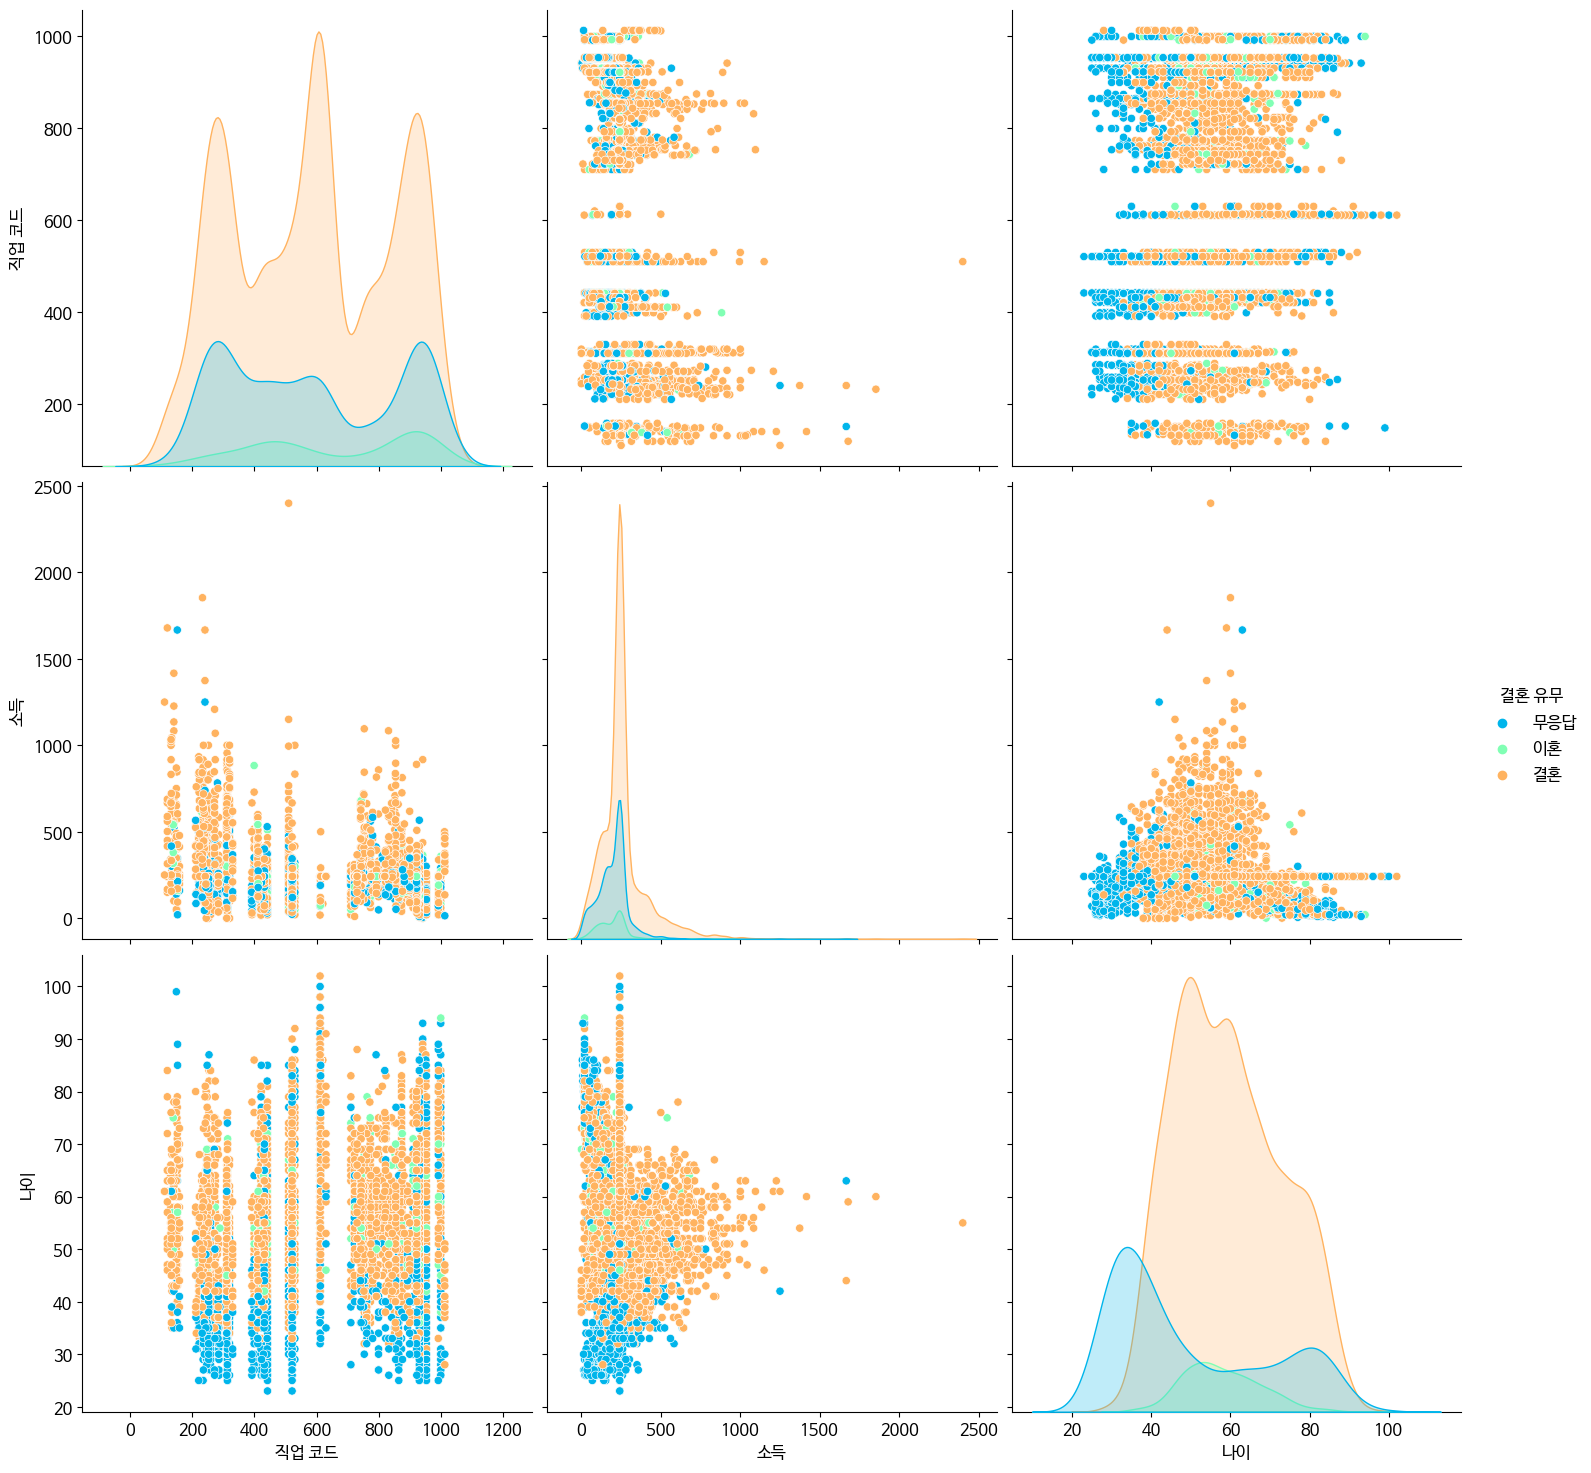

In [ ]:
sns.pairplot(data=newwelfare, hue='결혼 유무', palette="rainbow", height=5,)
FileSave()

seabornWelfare_19.png 파일이 저장되었습니다.


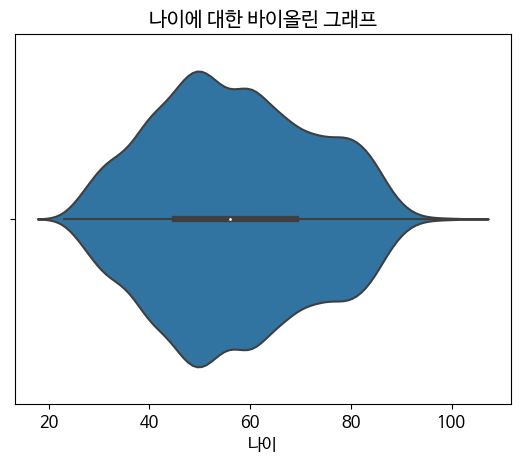

In [ ]:
plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x='나이', data=welfare)
FileSave()

x, y축을 지정해 줌으로써 바이올린을 분할하여 비교 분포를 볼 수 있습니다.
seabornWelfare_20.png 파일이 저장되었습니다.


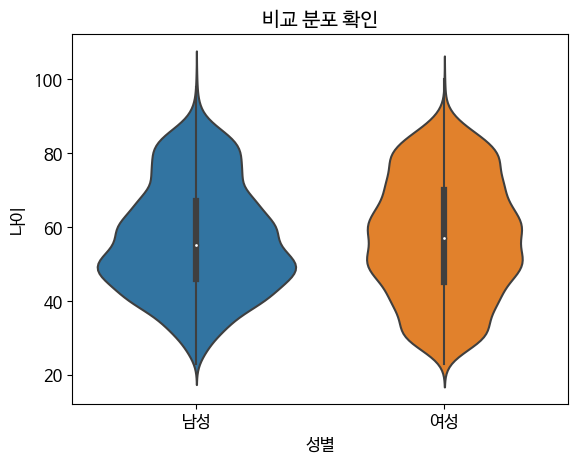

In [ ]:
print('x, y축을 지정해 줌으로써 바이올린을 분할하여 비교 분포를 볼 수 있습니다.')
plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x='성별', y='나이', data=welfare)
FileSave()

seabornWelfare_21.png 파일이 저장되었습니다.


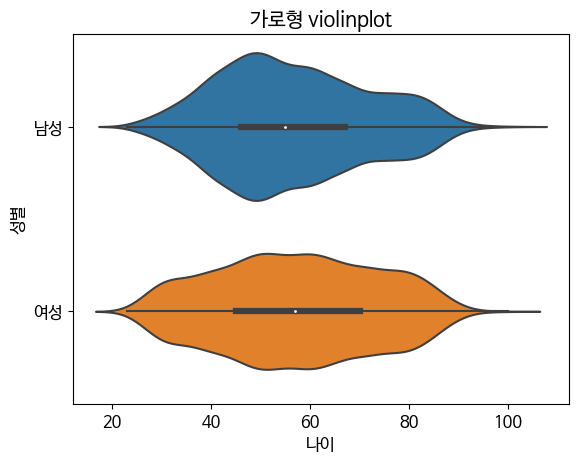

In [ ]:
plt.figure()
plt.title('가로형 violinplot')
sns.violinplot(y='성별', x='나이', data=welfare)
FileSave()

seabornWelfare_22.png 파일이 저장되었습니다.


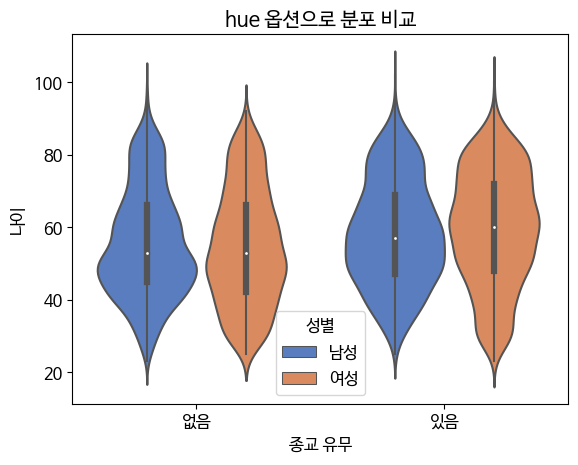

In [ ]:
plt.figure()
plt.title('hue 옵션으로 분포 비교')
sns.violinplot(x='종교 유무', y='나이', hue='성별', data=welfare, palette="muted")
FileSave()